# Modelo Predictivo: Random Forest Regressor

En este notebook se entrena un modelo de **Regresión con Random Forest** para predecir el precio promedio del aguacate (`AveragePrice`) en función de diversas características como el tipo, región, volumen de ventas y fecha.

El dataset utilizado (`avocado_final_clean.csv`) ya ha sido sometido a un proceso previo de:
- Limpieza de valores nulos  
- Tratamiento de outliers  
- Codificación de variables categóricas  
- Estandarización de variables predictoras  

---


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Cargar el dataset limpio y estandarizado
df = pd.read_csv("avocado_final_clean.csv")

print(f"✅ Dataset cargado: {df.shape[0]} filas y {df.shape[1]} columnas")
df.head()


✅ Datos cargados correctamente:
Entrenamiento: (14599, 68), Prueba: (3650, 68)


## Separación de Variables

El modelo debe predecir el **precio promedio del aguacate (`AveragePrice`)**, por lo tanto:

- **Variable objetivo (`y`)**: `AveragePrice`
- **Variables predictoras (`X`)**: todas las demás columnas del dataset.

Se separan ambas para permitir el entrenamiento supervisado del modelo.


In [ ]:
# Separar variable objetivo y variables predictoras
target = "AveragePrice"
X = df.drop(columns=[target])
y = df[target]

print("Variable objetivo: {target}")
print("Variables predictoras: {X.shape[1]}")


##  División de Datos: Entrenamiento y Prueba

Para evaluar correctamente el desempeño del modelo, se divide el dataset en dos partes:

- **Conjunto de Entrenamiento (80%)**: usado para entrenar el modelo.
- **Conjunto de Prueba (20%)**: usado para medir qué tan bien generaliza el modelo a datos no vistos.

La división se realiza con `train_test_split`, fijando una semilla aleatoria (`random_state=42`) para garantizar reproducibilidad.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"📊 Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")


## Entrenamiento del Modelo: Random Forest Regressor

Se emplea el algoritmo **Random Forest**, un método de *ensembles* basado en la combinación de múltiples árboles de decisión.

### Parámetros utilizados:
- `n_estimators=200` → número de árboles en el bosque.
- `max_depth=None` → los árboles crecen sin límite de profundidad.
- `random_state=42` → garantiza resultados reproducibles.
- `n_jobs=-1` → usa todos los núcleos del procesador para acelerar el entrenamiento.


In [ ]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
print("✅ Modelo Random Forest entrenado correctamente.")

✅ Modelo Random Forest entrenado correctamente.


## Evaluación del Desempeño del Modelo

Una vez entrenado el modelo, se evalúa utilizando el conjunto de prueba con las siguientes métricas:

- **MAE (Mean Absolute Error)** → mide el error promedio absoluto.
- **RMSE (Root Mean Squared Error)** → penaliza más los errores grandes.
- **R² (Coeficiente de Determinación)** → indica el grado de ajuste (1 = ajuste perfecto).

Estas métricas permiten entender la precisión y estabilidad del modelo.


In [ ]:
# Predicciones sobre el conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📈 Resultados del modelo:")
print(f"MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R²   (Coeficiente de Determinación): {r2:.4f}")


📈 Resultados del modelo:
MAE  (Error Absoluto Medio): 0.0852
RMSE (Raíz del Error Cuadrático Medio): 0.1196
R²   (Coeficiente de Determinación): 0.9084


## Análisis de Importancia de Variables

El modelo Random Forest permite conocer qué variables influyen más en la predicción.

Esto se calcula a partir de la **importancia promedio de las características** en la reducción del error dentro de los árboles.

A continuación se muestran las 10 variables más relevantes.


In [ ]:
importances = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": rf.feature_importances_
}).sort_values(by="Importancia", ascending=False)

importances.head(10)



🔍 Top 10 variables más influyentes:
        Variable  Importancia
13  type_organic     0.390561
6     Large Bags     0.079975
1           4046     0.076199
2           4225     0.065075
12          week     0.057379
10         month     0.046857
8           year     0.034159
9      year_date     0.030551
4     Total Bags     0.029937
0   Total Volume     0.027257


## Visualización de Importancia de Variables

Para una mejor interpretación visual, se muestra un gráfico de barras con las 10 variables más influyentes en el precio promedio del aguacate.


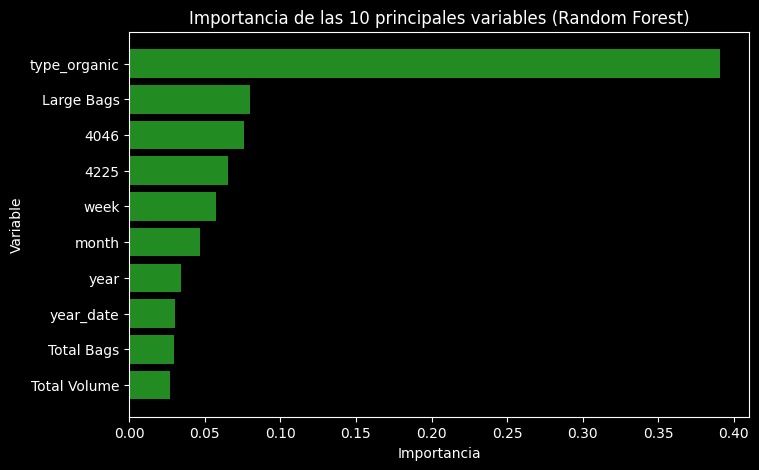

In [ ]:
import matplotlib.pyplot as plt

top10 = importances.head(10)
plt.figure(figsize=(8, 5))
plt.barh(top10["Variable"], top10["Importancia"], color='green')
plt.gca().invert_yaxis()
plt.title("🔍 Importancia de las 10 principales variables")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()


## Exportar Resultados

Por último, se exporta la tabla de importancias de variables a un archivo `.csv` para posibles análisis posteriores o visualizaciones en herramientas externas.


In [ ]:
importances.to_csv("rf_feature_importance.csv", index=False)
print("💾 Archivo exportado: rf_feature_importance.csv")


💾 Archivo exportado: rf_feature_importance.csv
